# ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics

# Input Data

In [2]:
df = pd.read_csv('../Data.csv')

In [3]:
dft = pd.read_csv('testing2.csv')

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_train = df.drop('label',axis=1).values
y_train = df['label'].values

X_test = dft.drop('label',axis=1).values
y_test = dft['label'].values

# One-hot encode the target

In [5]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

In [6]:
print(y_train.shape, y_test.shape)

(18000, 6) (1500, 6)


# scale the features

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=521,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
%%time
model.fit(x=X_train, y=y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

Train on 18000 samples, validate on 1500 samples
Epoch 1/100
18000/18000 [==============================] - 1s 80us/sample - loss: 1.7088 - accuracy: 0.2518 - val_loss: 1.5426 - val_accuracy: 0.4480
Epoch 2/100
18000/18000 [==============================] - 0s 26us/sample - loss: 1.4653 - accuracy: 0.4172 - val_loss: 1.3629 - val_accuracy: 0.4820
Epoch 3/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.3393 - accuracy: 0.4856 - val_loss: 1.2674 - val_accuracy: 0.5407
Epoch 4/100
18000/18000 [==============================] - 0s 22us/sample - loss: 1.2457 - accuracy: 0.5233 - val_loss: 1.1837 - val_accuracy: 0.6120
Epoch 5/100
18000/18000 [==============================] - 0s 22us/sample - loss: 1.1690 - accuracy: 0.5550 - val_loss: 1.1206 - val_accuracy: 0.6187
Epoch 6/100
18000/18000 [==============================] - 0s 22us/sample - loss: 1.1187 - accuracy: 0.5786 - val_loss: 1.0534 - val_accuracy: 0.6407
Epoch 7/100
18000/18000 [==========================

Epoch 55/100
18000/18000 [==============================] - 0s 24us/sample - loss: 0.4070 - accuracy: 0.8481 - val_loss: 0.7398 - val_accuracy: 0.8867
Epoch 56/100
18000/18000 [==============================] - 0s 24us/sample - loss: 0.3801 - accuracy: 0.8529 - val_loss: 0.7638 - val_accuracy: 0.9013
Epoch 57/100
18000/18000 [==============================] - 0s 22us/sample - loss: 0.3989 - accuracy: 0.8467 - val_loss: 0.7792 - val_accuracy: 0.8867
Epoch 58/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3984 - accuracy: 0.8479 - val_loss: 0.7172 - val_accuracy: 0.8960
Epoch 59/100
18000/18000 [==============================] - 0s 22us/sample - loss: 0.3829 - accuracy: 0.8547 - val_loss: 0.7498 - val_accuracy: 0.8893
Epoch 60/100
18000/18000 [==============================] - 0s 22us/sample - loss: 0.3751 - accuracy: 0.8561 - val_loss: 0.7769 - val_accuracy: 0.8900
Epoch 61/100
18000/18000 [==============================] - 0s 22us/sample - loss: 0.3755 - ac

# Modle Performance

In [10]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

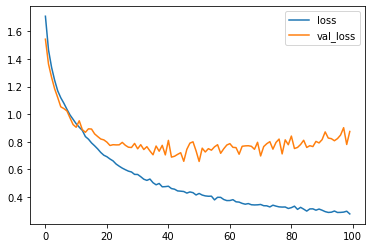

In [11]:
losses[['loss','val_loss']].plot()

# Predict

In [12]:
predictions = model.predict(X_test)


# Confusion Matrix

In [13]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(predictions,axis=1)

In [14]:
print(confusion_matrix(y_test_arg, Y_pred))

[[243   3   0   0   1   3]
 [  5 198   0  44   0   3]
 [  2   0 235   0   0  13]
 [  0   0   0 250   0   0]
 [ 47   0   0   0 198   5]
 [  0   0   0   0   1 249]]


<AxesSubplot:>

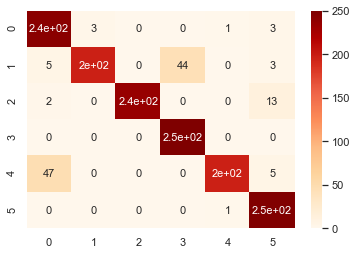

In [15]:
array = metrics.confusion_matrix(y_test_arg, Y_pred)
df_cm = pd.DataFrame(array, range(6), range(6))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 11}, cmap="OrRd") # font size

# classification Report

In [16]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       250
           1       0.99      0.79      0.88       250
           2       1.00      0.94      0.97       250
           3       0.85      1.00      0.92       250
           4       0.99      0.79      0.88       250
           5       0.91      1.00      0.95       250

    accuracy                           0.92      1500
   macro avg       0.93      0.92      0.91      1500
weighted avg       0.93      0.92      0.91      1500

